### Import Packages

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Seattle Collision Data

https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions/data?geometry=-122.526%2C47.676%2C-122.198%2C47.717&page=4

01/01/2014 - 03/29/2018

data with weather info available 01/01/2014 - 01/30/2018

(lat, lon) values have 6 decimal places (precision at individual human level)

In [57]:
df_collision_orig = pd.read_csv('Collisions.csv')

/home/fei/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [129]:
df_collision_orig.head(1).T

,0
X,-122.342
Y,47.6276
objectid,162244138
inckey,233006
coldetkey,233406
addrtype,Block
collisiontype,Head On
exceptrsncode,
exceptrsndesc,NaN
fatalities,0


In [58]:
df_collision_orig.columns.values

array(['X', 'Y', 'objectid', 'inckey', 'coldetkey', 'addrtype',
       'collisiontype', 'exceptrsncode', 'exceptrsndesc', 'fatalities',
       'inattentionind', 'incdate', 'incdttm', 'injuries', 'intkey',
       'junctiontype', 'lightcond', 'location', 'pedcount', 'pedcylcount',
       'pedrownotgrnt', 'personcount', 'reportno', 'roadcond',
       'sdot_colcode', 'sdot_coldesc', 'sdotcolnum', 'seriousinjuries',
       'severitycode', 'severitydesc', 'speeding', 'st_colcode',
       'st_coldesc', 'status', 'underinfl', 'vehcount', 'weather',
       'seglanekey', 'crosswalkkey', 'hitparkedcar'], dtype=object)

In [74]:
columns = ['X', 'Y', 'addrtype', 'incdate', 'incdttm', 'lightcond', 'location', 'sdot_coldesc'
          , 'severitydesc', 'speeding', 'weather']

df_collision = df_collision_orig.loc[:, columns]

In [93]:
df_collision.head(1).T

,0
X,-122.342
Y,47.6276
addrtype,Block
incdate,2016-11-04
incdttm,2016-11-04 09:55:00
lightcond,Daylight
location,DEXTER AVE N BETWEEN ALOHA ST AND WARD ST
sdot_coldesc,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
severitydesc,Property Damage Only Collision
speeding,NaN


In [124]:
df_collision.groupby('weather').count()

,X,Y,addrtype,incdate,incdttm,lightcond,location,sdot_coldesc,severitydesc,speeding
weather,,,,,,,,,,
Blowing Sand or Dirt or Snow,33,33,33,38,38,37,33,38,38,2
Clear or Partly Cloudy,99299,99299,100094,100575,100575,100481,99711,100575,100575,3913
Fog/Smog/Smoke,486,486,493,498,498,498,490,498,498,44
Other,720,720,731,760,760,754,722,760,760,25
Overcast,25057,25057,25261,25389,25389,25374,25166,25389,25389,1451
Raining,30297,30297,30513,30646,30646,30627,30430,30646,30646,3000
Severe Crosswind,19,19,19,19,19,19,19,19,19,0
Sleet/Hail/Freezing Rain,106,106,106,107,107,107,106,107,107,23
Snowing,792,792,798,803,803,799,796,803,803,172


In [83]:
df_collision.incdttm = pd.to_datetime(df_collision.incdttm)

In [92]:
df_collision.incdate = df_collision.incdttm.dt.date

In [98]:
w = df_collision.groupby('incdate').count().weather

In [105]:
w[w > 0]

incdate
2004-01-01    26
2004-01-02    66
2004-01-03    20
2004-01-04    14
2004-01-05    18
2004-01-06    38
2004-01-07    26
2004-01-08    24
2004-01-09    38
2004-01-10    32
2004-01-11    18
2004-01-12    42
2004-01-13    38
2004-01-14    63
2004-01-15    42
2004-01-16    27
2004-01-17    23
2004-01-18    22
2004-01-19    23
2004-01-20    23
2004-01-21    26
2004-01-22    31
2004-01-23    45
2004-01-24    28
2004-01-25    20
2004-01-26    25
2004-01-27    27
2004-01-28    46
2004-01-29    44
2004-01-30    36
              ..
2018-01-09    36
2018-01-10    23
2018-01-11    51
2018-01-12    34
2018-01-13    21
2018-01-14    16
2018-01-15    25
2018-01-16    25
2018-01-17    28
2018-01-18    44
2018-01-19    29
2018-01-20    23
2018-01-21    30
2018-01-22    25
2018-01-23    51
2018-01-24    35
2018-01-25    40
2018-01-26    33
2018-01-27    32
2018-01-28    27
2018-01-29    21
2018-01-30    14
2018-02-01     1
2018-02-05     1
2018-02-07     1
2018-02-13     2
2018-02-16     1
2018-0

### Seattle Crime Stats

https://data.seattle.gov/Public-Safety/Seattle-Crime-Stats-by-Police-Precinct-2008-Presen/3xqu-vnum

no lat, lon data; only date

maybe useful for analyzing the trending of different types of crimes to see if there is any correlation with collisions

01/2018 - 04/2014, monthly data

In [107]:
df_crime = pd.read_csv("Seattle_Crime_Stats_by_Police_Precinct_2008-Present.csv")

In [108]:
df_crime.head()

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,B1,Homicide,Homicide,0,01/01/2008,B,N,1
1,B1,Rape,Rape,0,01/01/2008,B,N,2
2,B1,Robbery,Robbery,5,01/01/2008,B,N,3
3,B1,Assault,Assault,1,01/01/2008,B,N,4
4,B1,Larceny-Theft,Larceny-Theft,35,01/01/2008,B,N,5


In [109]:
df_crime.shape

(27125, 8)

In [110]:
df_crime.dtypes

Police Beat          object
CRIME_TYPE           object
CRIME_DESCRIPTION    object
STAT_VALUE            int64
REPORT_DATE          object
Sector               object
Precinct             object
Row_Value_ID          int64
dtype: object

In [23]:
from datetime import datetime

# df.REPORT_DATE = 
datetime.strptime(df.REPORT_DATE[400], '%m/%d/%Y')

datetime.datetime(2008, 2, 1, 0, 0)

In [118]:
df_crime.REPORT_DATE = pd.to_datetime(df_crime.REPORT_DATE)

In [122]:
sorted(df_crime.REPORT_DATE.value_counts().index.values)

[numpy.datetime64('2008-01-01T00:00:00.000000000'),
 numpy.datetime64('2008-02-01T00:00:00.000000000'),
 numpy.datetime64('2008-03-01T00:00:00.000000000'),
 numpy.datetime64('2008-04-01T00:00:00.000000000'),
 numpy.datetime64('2008-05-01T00:00:00.000000000'),
 numpy.datetime64('2008-06-01T00:00:00.000000000'),
 numpy.datetime64('2008-07-01T00:00:00.000000000'),
 numpy.datetime64('2008-08-01T00:00:00.000000000'),
 numpy.datetime64('2008-09-01T00:00:00.000000000'),
 numpy.datetime64('2008-10-01T00:00:00.000000000'),
 numpy.datetime64('2008-11-01T00:00:00.000000000'),
 numpy.datetime64('2008-12-01T00:00:00.000000000'),
 numpy.datetime64('2009-01-01T00:00:00.000000000'),
 numpy.datetime64('2009-02-01T00:00:00.000000000'),
 numpy.datetime64('2009-03-01T00:00:00.000000000'),
 numpy.datetime64('2009-04-01T00:00:00.000000000'),
 numpy.datetime64('2009-05-01T00:00:00.000000000'),
 numpy.datetime64('2009-06-01T00:00:00.000000000'),
 numpy.datetime64('2009-07-01T00:00:00.000000000'),
 numpy.datet

### 911 Incident Response

https://data.seattle.gov/Public-Safety/Seattle-Police-Department-911-Incident-Response/3k2p-39jpm

July 2010 -- Now

connect this with the Collision data with location and incident?

In [30]:
df_911 = pd.read_csv("Seattle_Police_Department_911_Incident_Response.csv")

/home/fei/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df_911.head(1).T

,0
CAD CDW ID,﻿15736
CAD Event Number,10000246357
General Offense Number,2010246357
Event Clearance Code,242
Event Clearance Description,FIGHT DISTURBANCE
Event Clearance SubGroup,DISTURBANCES
Event Clearance Group,DISTURBANCES
Event Clearance Date,07/17/2010 08:49:00 PM
Hundred Block Location,3XX BLOCK OF PINE ST
District/Sector,M


In [32]:
df_911.loc[:,"Event Clearance Date"].head()

0    07/17/2010 08:49:00 PM
1    07/17/2010 08:50:00 PM
2    07/17/2010 08:55:00 PM
3    07/17/2010 09:00:00 PM
4    07/17/2010 09:00:00 PM
Name: Event Clearance Date, dtype: object

### Seattle Weather Data

https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017

01/01/1948 - 12/14/2017, per-day,  prcp, tmax, tmin, rainOrNot, SeaTac Airport Weather Station

This data was collected at the Seattle-Tacoma International Airport. The dataset contains five columns:

    DATE = the date of the observation
    PRCP = the amount of precipitation, in inches
    TMAX = the maximum temperature for that day, in degrees Fahrenheit
    TMIN = the minimum temperature for that day, in degrees Fahrenheit
    RAIN = TRUE if rain was observed on that day, FALSE if it was not

In [33]:
df_weather_rain = pd.read_csv("seattleWeather_1948-2017.csv")

In [34]:
df_weather_rain.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [19]:
df.shape

(25551, 5)

In [35]:
df_weather_rain.DATE = pd.to_datetime(df_weather_rain.DATE)

In [36]:
df_weather_rain.DATE.value_counts()

1968-11-10    1
1984-01-30    1
2006-07-11    1
1999-04-30    1
1989-11-20    1
2011-10-30    1
1966-04-30    1
2008-12-18    1
1964-04-11    1
1955-09-13    1
1953-09-14    1
1958-04-09    1
1961-09-11    1
1965-02-13    1
1966-04-06    1
1969-09-08    1
1973-02-10    1
1977-09-05    1
1979-12-18    1
1984-07-12    1
1985-09-02    1
1990-03-28    1
1994-10-21    1
1999-10-31    1
1980-05-20    1
1999-05-16    1
1969-09-19    1
1948-10-08    1
1954-08-21    1
1963-04-19    1
             ..
1996-04-20    1
1982-10-30    1
2001-06-19    1
1973-05-19    1
2003-03-06    1
1956-07-31    1
1968-12-22    1
1971-07-23    1
1974-11-06    1
2016-04-15    1
1981-03-13    1
2010-03-03    1
1955-03-18    1
1969-04-12    1
1950-12-14    1
1989-06-21    1
1983-12-25    1
1978-05-31    1
2013-10-09    1
1960-02-23    1
1951-05-19    1
1998-08-09    1
1991-07-28    1
1964-10-04    1
2007-09-27    1
2004-08-21    1
1980-09-09    1
1982-10-08    1
2010-11-13    1
1970-01-01    1
Name: DATE, Length: 2555

In [37]:
df_weather_rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [49]:
df_weather_rain.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


TypeError: invalid type promotion

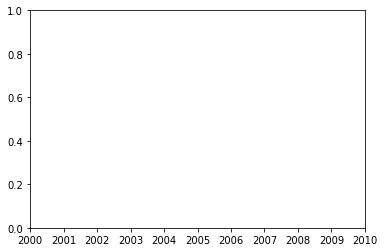

In [39]:
plt.scatter(df_weather_rain.DATE, df_weather_rain.TMAX)

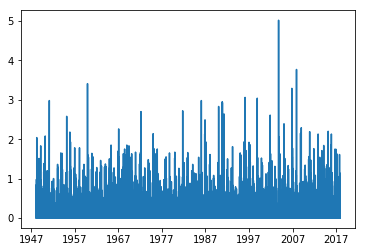

In [41]:
x = df_weather_rain.DATE.values
y = df_weather_rain.PRCP.values

plt.plot(x,y)
plt.show()

### Road Weather Information Stations

https://data.seattle.gov/Transportation/Road-Weather-Information-Stations/egc4-d24i

large dataset, 31M rows, may need to use API to retrieve aggregated dataset or a subset

03/03/2014 - 04/16/2018, by minute

10 weather stations within Seattle

https://data.seattle.gov/d/ivtm-938t

location, time, road surface temperature, air temp

This data is derived from sensor stations placed on bridges and surface streets within city limits. Each station has a temperature sensor that measures the temperature of the street surface and a sensor that measures the ambient air temperature at the station each second. Those values are averaged into temperature readings that are recorded by the station every minute. The dataset is updated every fifteen minutes with new data.

In [125]:
df_weather_stations = pd.read_csv("Road_Weather_Information_Stations.csv") 

In [126]:
df_weather_stations.shape

(31642625, 6)

In [127]:
df_weather_stations.StationName.value_counts()

SpokaneSwingBridge           3475605
35thAveSW_SWMyrtleSt         3471082
RooseveltWay_NE80thSt        3309084
HarborAveUpperNorthBridge    3192882
AlaskanWayViaduct_KingSt     3119823
NE45StViaduct                3117396
AuroraBridge                 3101178
MagnoliaBridge               3010007
AlbroPlaceAirportWay         2941986
JoseRizalBridgeNorth         2903582
Name: StationName, dtype: int64

In [128]:
df_weather_stations.head()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",03/03/2014 12:42:00 PM,672560,53.88,53.88
1,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",03/03/2014 12:43:00 PM,672561,54.05,54.05
2,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",03/03/2014 12:44:00 PM,672562,54.21,54.21
3,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",03/03/2014 12:45:00 PM,672563,54.38,54.38
4,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",03/03/2014 12:46:00 PM,672564,54.54,54.54


In [132]:
diff = df_weather_stations.RoadSurfaceTemperature - df_weather_stations.AirTemperature

In [133]:
diff

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
5           0.00
6           0.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13          0.00
14          0.00
15          0.00
16          0.00
17          0.00
18          0.00
19          8.07
20          8.23
21          8.34
22          8.42
23          8.49
24          8.54
25          8.60
26          8.64
27          8.71
28          8.78
29          8.85
            ... 
31642595   -1.21
31642596   -1.18
31642597   -1.22
31642598   -1.22
31642599   -1.30
31642600   -1.49
31642601   -1.65
31642602   -1.74
31642603   -1.54
31642604   -1.68
31642605   -1.90
31642606   -1.81
31642607   -1.80
31642608   -1.56
31642609   -1.39
31642610   -1.27
31642611   -1.30
31642612   -1.35
31642613   -1.24
31642614   -1.17
31642615   -1.22
31642616   -1.21
31642617   -1.19
31642618   -1.49
31642619   -1.59
31642620   -1.56
31642621   -1.41
31642622   -1.

In [134]:
df_weather_stations.loc[21, :]

StationName               AlaskanWayViaduct_KingSt
StationLocation           (47.598438, -122.335612)
DateTime                    03/03/2014 12:48:00 PM
RecordId                                    690987
RoadSurfaceTemperature                       56.79
AirTemperature                               48.45
Name: 21, dtype: object

In [141]:
df_weather_stations.DateTime = pd.to_datetime(df_weather_stations.DateTime)

KeyboardInterrupt: 

In [ ]:
mask = (df_weather_stations.StationName == '35thAveSW_SWMyrtleSt')

In [ ]:
x = df_weather_stations[mask, ].DateTime.values
y = df_weather_stations[mask, ].RoadSurfaceTemperature.values

plt.plot(x,y)
plt.show()

### Traffic Flow Data 2016

https://data-seattlecitygis.opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9?geometry=-123.65%2C47.458%2C-121.463%2C47.782&page=187

In [135]:
df_flow = pd.read_csv("2016_Flow_Counts.csv")

In [136]:
df_flow.head()

,objectid,count_compkey,first_stname_ord,first_artdescript,first_trandescript,countflag,flowsegid,downtown,countstart,countaadt,countaawdt,estimate,awdt_round
0,1,1.0,15TH EMERSON RP,Principal Arterial,NOT DESIGNATED,Y,3.0,N,NaN,NaN,17000.000000,Y,17000.0
1,2,1.0,HARBOR AV SW OFF RP,Principal Arterial,NOT DESIGNATED,Y,4.0,N,2015-04-07T00:00:00.000Z,0.000000,4744.234000,NaN,4700.0
2,3,1.0,SW ADMIRAL WY OFF RP,Principal Arterial,NOT DESIGNATED,Y,5.0,N,2015-04-07T00:00:00.000Z,8163.881000,8534.922000,NaN,8500.0
3,4,1.0,W SEATTLE BR WB-CHEL RP,Principal Arterial,NOT DESIGNATED,Y,6.0,N,2014-04-14T00:00:00.000Z,1670.317991,2013.366185,NaN,2000.0
4,5,1.0,CHELAN-W SEATTLE BR RP,Principal Arterial,NOT DESIGNATED,N,7.0,N,2015-04-07T00:00:00.000Z,1232.561000,1498.849000,NaN,1500.0


### Traffic Beacon Data

https://data-seattlecitygis.opendata.arcgis.com/datasets/d6c8c39a7f854a80a24a1c5e8ac294bd_1/data?geometry=-123.65%2C47.458%2C-121.463%2C47.782&page=41&selectedAttribute=FLASHING

In [137]:
df_beacon = pd.read_csv("Traffic_Beacons.csv")

In [139]:
df_beacon.head(2)

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,OWNERSHIP,CURRENT_STATUS,...,SPAN_CONDITION,CONTROL_CONDITION,CONTROL_TYPE,MODEM_TYPE,MODEL_TYPE,SIDE,SCHOOL_SPEED_CAMERA,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT
0,-122.341266,47.663646,1,626699,BCN-386,STONE WAY N 0480 BLOCK NW SIDE ( 0) 0 FT NE/...,,NaN,,,...,,,,,BCN-RRFB,NW,N,NaN,-122.341266,47.663646
1,-122.271308,47.523394,2,626755,BCN-390,S HENDERSON ST 0500 BLOCK N SIDE ( 0) 304 FT...,,NaN,,,...,,,,,BCN-RRFB,N,N,NaN,-122.271308,47.523394
